In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_activity = pd.read_csv('C:/Users/hasna/Desktop/SITA/Python/Pandas/BellaBeat/Cleaned_Activity.csv')

In [3]:
df_activity.head()

,customer_id,date,day_of_week,total_steps,total_distance,tracker_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,month,total_active_minutes,steps_to_distance_ratio
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,4,366,1548.5
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797,4,257,1540.2
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776,4,222,1551.9
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745,4,272,1554.5
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863,4,267,1552.6


In [4]:
df_activity.columns

Index(['customer_id', 'date', 'day_of_week', 'total_steps', 'total_distance',
       'tracker_distance', 'very_active_distance',
       'moderately_active_distance', 'light_active_distance',
       'sedentary_active_distance', 'very_active_minutes',
       'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes',
       'calories', 'month', 'total_active_minutes', 'steps_to_distance_ratio'],
      dtype='object')

In [5]:
# total steps per user, limit to top 5 users
total_steps_per_user = df_activity.groupby('customer_id')['total_steps'].sum().reset_index()
top_5_users = total_steps_per_user.sort_values(by='total_steps', ascending=False).head(5)
print(top_5_users)


    customer_id  total_steps
32   8877689391       497241
27   8053475328       457662
0    1503960366       375619
5    2022484408       352490
15   4388161847       335232


### Average Steps Per Day

In [6]:
# Average steps per day of week in descending order of average total steps


total_steps_per_day = df_activity.groupby('day_of_week')['total_steps'].sum().reset_index()
average_steps_per_day = total_steps_per_day.copy()
average_steps_per_day['average_steps'] = round(average_steps_per_day['total_steps'] / df_activity['day_of_week'].value_counts().sort_index().values,2)
average_steps_per_day = average_steps_per_day.sort_values(by='average_steps', ascending=False)
print(average_steps_per_day)



  day_of_week  total_steps  average_steps
2    Saturday      1010969        8152.98
5     Tuesday      1235001        8125.01
1      Monday       933704        7780.87
6   Wednesday      1133906        7559.37
0      Friday       938477        7448.23
4    Thursday      1088658        7405.84
3      Sunday       838921        6933.23


<b> Saturday </b> and <b>Tuesday</b> have the highest average total steps. 

Whereas <b>Sunday</b> has the lowest average total steps.

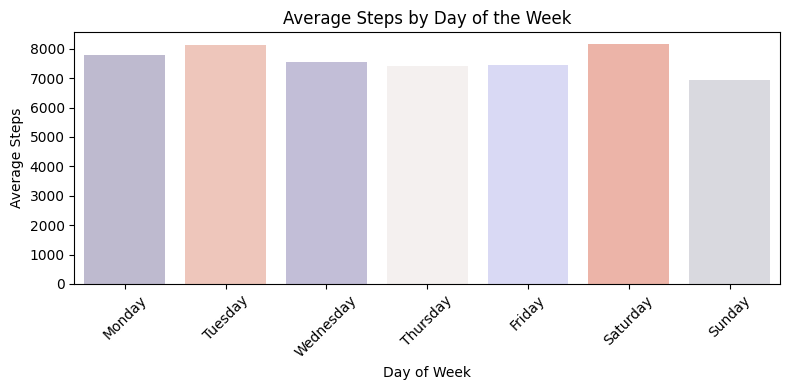

In [7]:
# Plotting Average Steps by Day of the Week 

day_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]
plt.figure(figsize=(8,4))

bellabeat_palette = [
    "#F7AC9D",  # stronger peach
    "#F6C1B3",  # peach blush
    "#BCB7D2",  # lavender
    "#BFBADB",  # muted purple
    "#D4D4F9",  # light gray
    "#F5F0EE",  # lavender pink
    "#D8D8E0"   # soft gray
]

sns.barplot(
    data=average_steps_per_day,
    x='day_of_week',
    y='average_steps',
    order=day_order,
    hue='day_of_week',     # assign hue
    palette= bellabeat_palette,
    legend = False
)

plt.title('Average Steps by Day of the Week')
plt.xlabel ('Day of Week')
plt.ylabel ('Average Steps')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

### Correlation between Steps taken and Calories burned

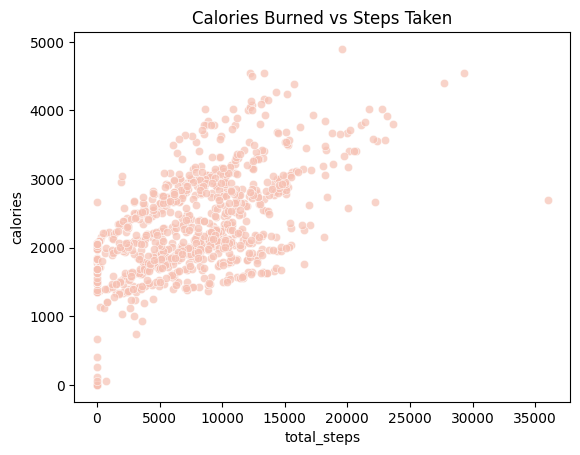

In [9]:
sns.scatterplot(
    data=df_activity,
    x='total_steps',
    y='calories',
    alpha=0.7,
    color='#F6C1B3'
)

plt.title('Calories Burned vs Steps Taken')
plt.show()

<Axes: xlabel='Total_Steps', ylabel='Calories'>

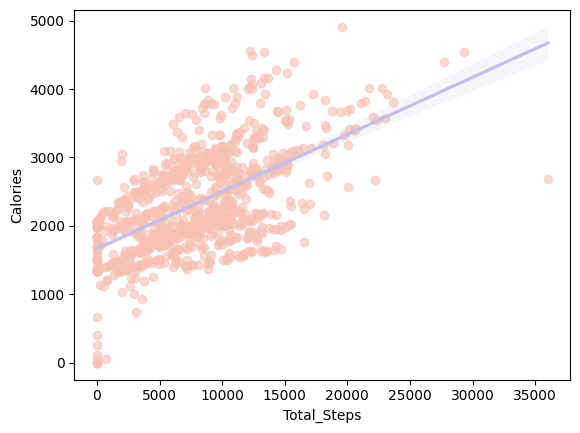

In [48]:
# Scatter plus trend line

sns.regplot(
    data=df_activity,
    x='Total_Steps',
    y='Calories',
    scatter_kws={'color': '#F6C1B3', 'alpha': 0.6},
    line_kws={'color': '#C6BEE8'}  # soft lavender line
)

### 
The analysis shows a <b>positive</b> relationship between steps taken and calories burned, suggesting that increased daily movement leads to higher calorie expenditure.


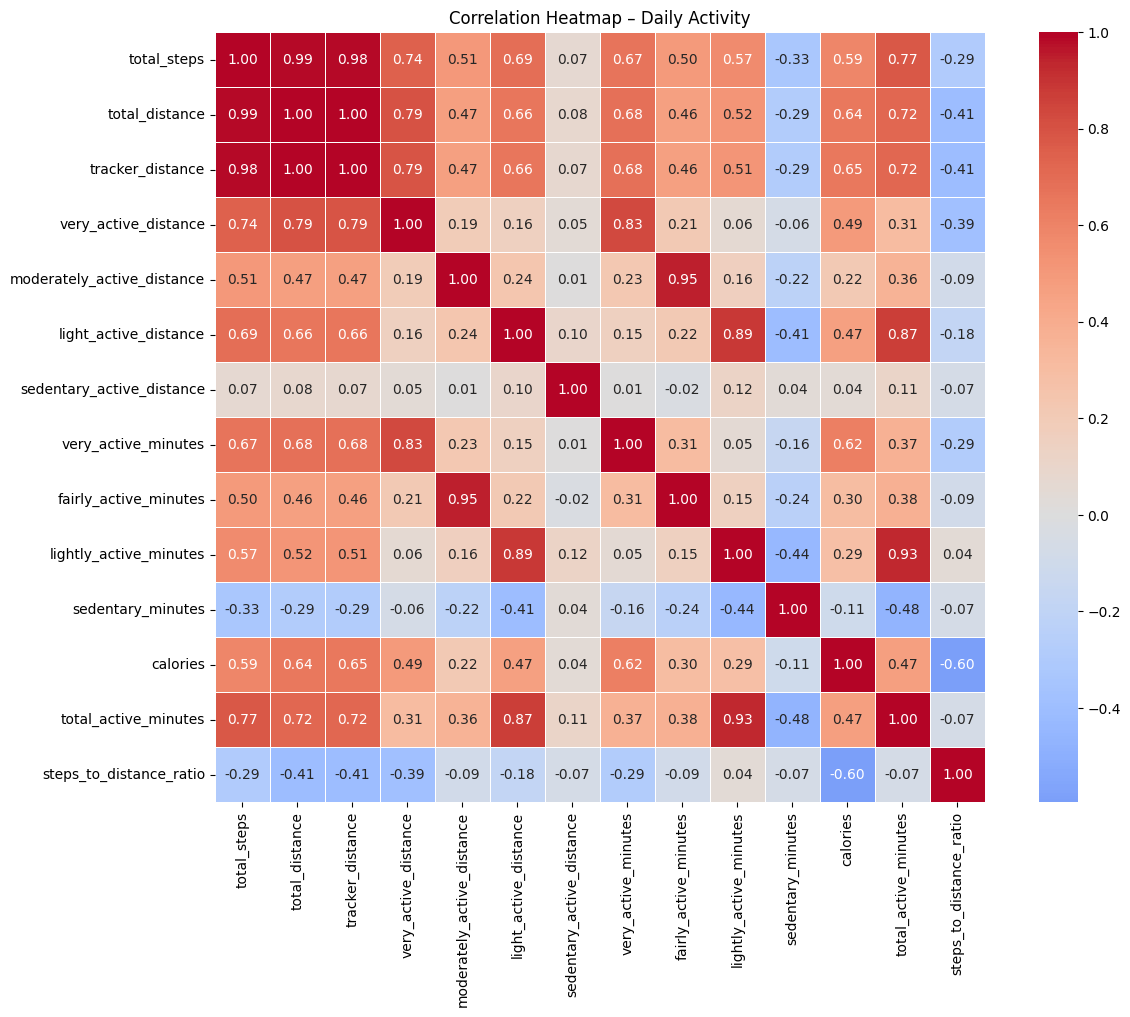

In [30]:
# Correlaton works on numeric data, so we drop non numeric columns
numeric_df = df_activity.select_dtypes(include="number").drop(
    columns=["customer_id", "month"]
)
corr = numeric_df.corr()

# Create the heatmap

plt.figure(figsize=(14, 10))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Correlation Heatmap – Daily Activity")
plt.show()

Strong positive correlation (red):

total_steps ↔ total_distance

very_active_minutes ↔ very_active_distance

total_active_minutes ↔ calories

Weak / near zero (white):

Sedentary vs active metrics

Negative (blue):

Active minutes vs sedentary minutes

####
The heatmap shows strong positive correlations between activity intensity metrics: total steps, total distance, and active minutes indicating they increase together. Calories burned is also strongly correlated with total and very active minutes, suggesting higher activity drives energy expenditure. Sedentary minutes show weak or negative correlations with active measures, meaning more inactivity generally coincides with less movement and lower calorie burn.

####

In [32]:
df_sleep = pd.read_csv('C:/Users/hasna/Desktop/SITA/Python/Pandas/BellaBeat/Cleaned_Sleep.csv')
df_weight = pd.read_csv('C:/Users/hasna/Desktop/SITA/Python/Pandas/BellaBeat/Cleaned_Weight.csv')

In [11]:
df_sleep.columns

Index(['customer_id', 'date', 'day_of_week', 'total_sleep_records',
       'total_minutes_asleep', 'total_time_in_bed', 'sleep_efficiency',
       'day_type', 'total_hours_asleep', 'total_hours_in_bed'],
      dtype='object')

In [37]:
# Merge Activity + Sleep

df_merged = df_activity.merge(
    df_sleep,
    on=['customer_id', 'date'],
    how='left'
)


In [ ]:
# Merge the result with Weight

df_merged = df_merged.merge(
    df_weight,
    on=['customer_id', 'date'],
    how='left'
)

# ✅ Now df_merged contains Activity + Sleep + Weight in one table.

In [43]:
print(df_merged.isna().sum())  # check missing values

customer_id                     0
date                            0
day_of_week_x                   0
total_steps                     0
total_distance                  0
tracker_distance                0
very_active_distance            0
moderately_active_distance      0
light_active_distance           0
sedentary_active_distance       0
very_active_minutes             0
fairly_active_minutes           0
lightly_active_minutes          0
sedentary_minutes               0
calories                        0
month                           0
total_active_minutes            0
steps_to_distance_ratio        78
day_of_week_y                 530
total_sleep_records           530
total_minutes_asleep          530
total_time_in_bed             530
sleep_efficiency              530
day_type                      530
total_hours_asleep            530
total_hours_in_bed            530
weight_kg_x                   874
weight_pounds_x               874
fat_x                         938
bmi_x         

In [49]:
df_merged.tail()

,customer_id,date,day_of_week_x,total_steps,total_distance,tracker_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,...,fat_x,bmi_x,is_manual_report_x,log_id_x,weight_kg_y,weight_pounds_y,fat_y,bmi_y,is_manual_report_y,log_id_y
935,8877689391,2016-05-08,Sunday,10686,8.11,8.11,1.08,0.20,6.80,0.00,...,NaN,25.6,False,1.462693e+12,85.4,188.3,NaN,25.6,False,1.462693e+12
936,8877689391,2016-05-09,Monday,20226,18.25,18.25,11.10,0.80,6.24,0.05,...,NaN,25.6,False,1.462776e+12,85.5,188.5,NaN,25.6,False,1.462776e+12
937,8877689391,2016-05-10,Tuesday,10733,8.15,8.15,1.35,0.46,6.28,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,8877689391,2016-05-11,Wednesday,21420,19.56,19.56,13.22,0.41,5.89,0.00,...,NaN,25.6,False,1.462950e+12,85.4,188.3,NaN,25.6,False,1.462950e+12
939,8877689391,2016-05-12,Thursday,8064,6.12,6.12,1.82,0.04,4.25,0.00,...,NaN,25.1,False,1.463035e+12,84.0,185.2,NaN,25.1,False,1.463035e+12


In [70]:
df_merged = df_merged.rename(columns={'day_of_week_x': 'day_of_week'})
df_merged = df_merged.rename(columns={'weight_kg_y': 'weight_kg'})
df_merged = df_merged.rename(columns={'weight_pounds_y': 'weight_pounds'})
df_merged

,customer_id,date,day_of_week,total_steps,total_distance,tracker_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,...,fat_x,bmi_x,is_manual_report_x,log_id_x,weight_kg,weight_pounds,fat_y,bmi_y,is_manual_report_y,log_id_y
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,1.88,0.55,6.06,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,1.57,0.69,4.71,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,2.44,0.40,3.91,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,2.14,1.26,2.83,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,2.71,0.41,5.04,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,Sunday,10686,8.11,8.11,1.08,0.20,6.80,0.00,...,NaN,25.6,False,1.462693e+12,85.4,188.3,NaN,25.6,False,1.462693e+12
936,8877689391,2016-05-09,Monday,20226,18.25,18.25,11.10,0.80,6.24,0.05,...,NaN,25.6,False,1.462776e+12,85.5,188.5,NaN,25.6,False,1.462776e+12
937,8877689391,2016-05-10,Tuesday,10733,8.15,8.15,1.35,0.46,6.28,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,8877689391,2016-05-11,Wednesday,21420,19.56,19.56,13.22,0.41,5.89,0.00,...,NaN,25.6,False,1.462950e+12,85.4,188.3,NaN,25.6,False,1.462950e+12


In [74]:
# Sleep focused subset (for correlation)
df_sleep_analysis = df_merged.dropna(subset=['total_minutes_asleep'])

In [75]:
df_sleep_analysis.describe

<bound method NDFrame.describe of      customer_id        date day_of_week  total_steps  total_distance  \
0     1503960366  2016-04-12     Tuesday        13162            8.50   
1     1503960366  2016-04-13   Wednesday        10735            6.97   
3     1503960366  2016-04-15      Friday         9762            6.28   
4     1503960366  2016-04-16    Saturday        12669            8.16   
5     1503960366  2016-04-17      Sunday         9705            6.48   
..           ...         ...         ...          ...             ...   
898   8792009665  2016-04-30    Saturday         7174            4.59   
899   8792009665  2016-05-01      Sunday         1619            1.04   
900   8792009665  2016-05-02      Monday         1831            1.17   
901   8792009665  2016-05-03     Tuesday         2421            1.55   
902   8792009665  2016-05-04   Wednesday         2283            1.46   

     tracker_distance  very_active_distance  moderately_active_distance  \
0             

In [76]:
df_sleep_analysis.columns

Index(['customer_id', 'date', 'day_of_week', 'total_steps', 'total_distance',
       'tracker_distance', 'very_active_distance',
       'moderately_active_distance', 'light_active_distance',
       'sedentary_active_distance', 'very_active_minutes',
       'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes',
       'calories', 'month', 'total_active_minutes', 'steps_to_distance_ratio',
       'day_of_week_y', 'total_sleep_records', 'total_minutes_asleep',
       'total_time_in_bed', 'sleep_efficiency', 'day_type',
       'total_hours_asleep', 'total_hours_in_bed', 'weight_kg_x',
       'weight_pounds_x', 'fat_x', 'bmi_x', 'is_manual_report_x', 'log_id_x',
       'weight_kg', 'weight_pounds', 'fat_y', 'bmi_y', 'is_manual_report_y',
       'log_id_y'],
      dtype='object')

In [99]:
# % of days with sleep data

sleep_coverage = df_sleep_analysis.shape[0] / df_activity.shape[0] * 100
print(f"Sleep data coverage: {sleep_coverage:.1f}%")

Sleep data coverage: 43.6%


### 
Sleep data is available for fewer days than activity data, indicating inconsistent sleep tracking among users. As a result, sleep-related analyses were conducted on a subset of days where sleep records were present.

Daily Activity (941 rows)
→ Logged automatically by the device (steps, calories, etc.)

Sleep (410 rows)
→ Logged only when users actually tracked sleep

→ Some users:

-didn’t wear the device overnight

-didn’t enable sleep tracking

-logged sleep inconsistently

So sleep data is missing by design, not due to data quality issues.

#### Sleep vs Calories Burned

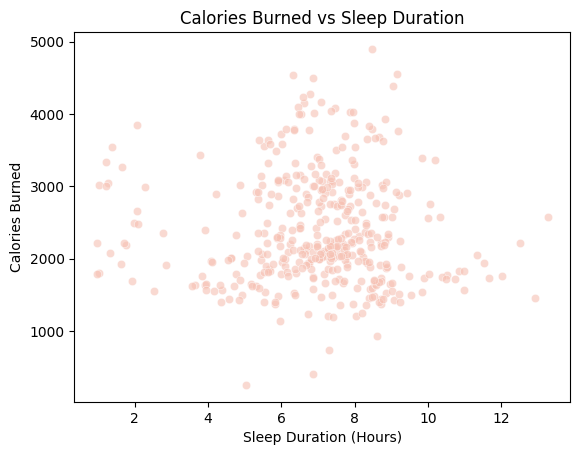

In [78]:
# Plotting a scatterplot using seaborn

sns.scatterplot(
    data = df_sleep_analysis,
    x = 'total_hours_asleep',
    y = 'calories',
    alpha = 0.6,
    color = '#F6C1B3'
)

plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Calories Burned')
plt.title('Calories Burned vs Sleep Duration')
plt.show()

#### Sleep vs Steps

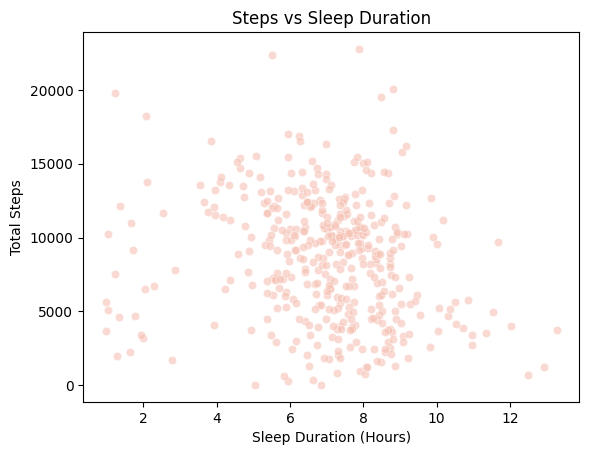

In [69]:
sns.scatterplot(
    data=df_sleep_analysis,
    x='total_hours_asleep',
    y='total_steps',
    alpha=0.6,
    color='#F6C1B3'
)

plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Total Steps')
plt.title('Steps vs Sleep Duration')
plt.show()

#### Sleep by Day of Week

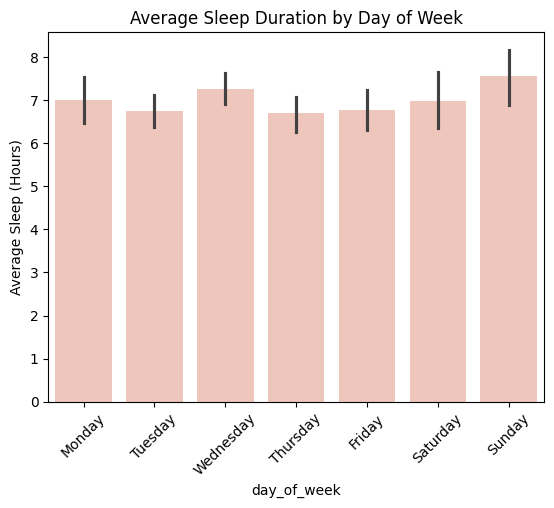

In [ ]:
# Sleep by Day of Week

sns.barplot(
    data=df_sleep_analysis,
    x='day_of_week',
    y='total_hours_asleep',
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    color='#F6C1B3'
)

plt.ylabel('Average Sleep (Hours)')
plt.title('Average Sleep Duration by Day of Week')
plt.xticks(rotation=45)
plt.show()

#### Correlation Coefficients

In [82]:
steps_cal_corr = df_sleep_analysis[['total_steps', 'calories']].corr().iloc[0,1]
sleep_cal_corr = df_sleep_analysis[['total_hours_asleep', 'calories']].corr().iloc[0,1]
sleep_steps_corr = df_sleep_analysis[['total_hours_asleep', 'total_steps']].corr().iloc[0,1]

print(f"Steps vs Calories correlation: {steps_cal_corr:.2f}")
print(f"Sleep vs Calories correlation: {sleep_cal_corr:.2f}")
print(f"Sleep vs Steps correlation: {sleep_steps_corr:.2f}")

Steps vs Calories correlation: 0.41
Sleep vs Calories correlation: -0.03
Sleep vs Steps correlation: -0.19


- Steps ↔ Calories → moderate positive.

There is a moderate positive correlation between steps taken and calories burned, indicating that higher daily activity is associated with increased energy expenditure.

- Sleep ↔ Calories → weak.

Sleep duration shows virtually no relationship with calories burned, suggesting that energy expenditure is driven primarily by physical activity rather than sleep length.

- Sleep ↔ Steps → weak to moderate.

A weak negative relationship is observed between sleep duration and steps taken, indicating that longer sleep does not necessarily translate into higher daily activity levels.

#### Sleep coverage

- Sleep data is available for a subset of days, indicating inconsistent sleep tracking among users.

These correlations naturally support feature separation:

📍 Steps → activity & calorie goals.

🌙 Sleep → recovery & wellness, not calorie burn.

🧘 Sleep and activity complement each other, but don’t move in lockstep.

In [87]:
# Weight focused subset (for correlation)
df_weight_analysis = df_merged.dropna(subset=['weight_kg'])

In [ ]:
# % of days with weight data

weight_coverage = df_weight_analysis.shape[0] / df_activity.shape[0] * 100
print(f"Weight data coverage: {weight_coverage:.1f}%")

Weight data coverage: 7.0%


Weight data was available for approximately 7% of activity-recorded days, reflecting the infrequent and manual nature of weight logging.

In [ ]:
df_weight_analysis.desribe

<bound method NDFrame.describe of      customer_id        date day_of_week  total_steps  total_distance  \
20    1503960366  2016-05-02      Monday        14727            9.71   
124   1927972279  2016-04-13   Wednesday          356            0.25   
274   2873212765  2016-04-21    Thursday         8859            5.98   
295   2873212765  2016-05-12    Thursday         7566            5.11   
386   4319703577  2016-04-17      Sunday           29            0.02   
..           ...         ...         ...          ...             ...   
933   8877689391  2016-05-06      Friday        21727           19.34   
935   8877689391  2016-05-08      Sunday        10686            8.11   
936   8877689391  2016-05-09      Monday        20226           18.25   
938   8877689391  2016-05-11   Wednesday        21420           19.56   
939   8877689391  2016-05-12    Thursday         8064            6.12   

     tracker_distance  very_active_distance  moderately_active_distance  \
20            

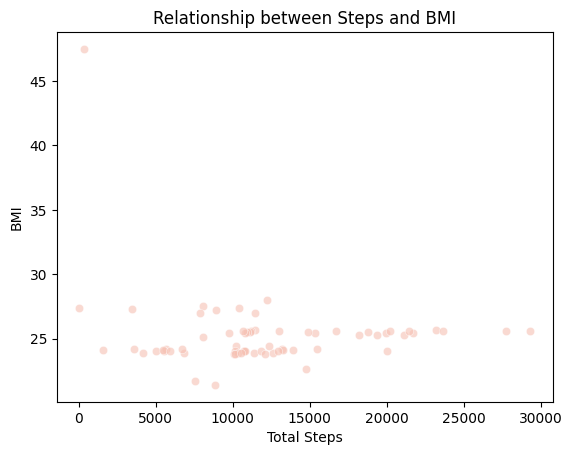

In [109]:
# Analyzing 66 records

sns.scatterplot(
    data=df_weight_analysis,
    x='total_steps',
    y='bmi_x',
    alpha=0.6,
    color='#F6C1B3'
)

plt.xlabel('Total Steps')
plt.ylabel('BMI')
plt.title('Relationship between Steps and BMI')
plt.show()

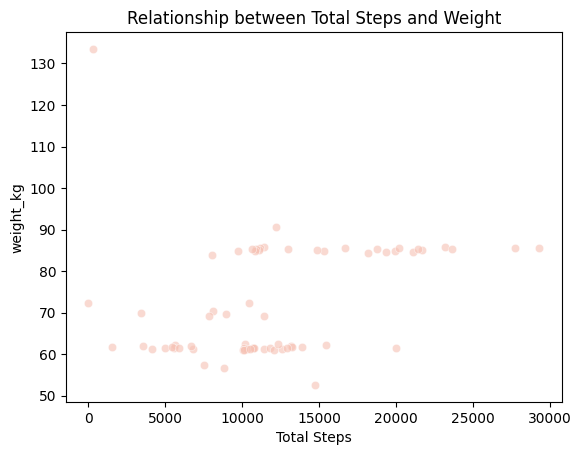

In [107]:
# Relationship between Total Steps and Weight

sns.scatterplot(
    data=df_weight_analysis,
    x='total_steps',
    y='weight_kg',
    alpha=0.6,
    color='#F6C1B3'
)

plt.xlabel('Total Steps')
plt.ylabel('weight_kg')
plt.title('Relationship between Total Steps and Weight')
plt.show()

In [95]:
steps_bmi_corr = df_weight_analysis[['total_steps', 'bmi_x']].corr().iloc[0,1]
steps_weight_corr = df_weight_analysis[['total_steps', 'weight_kg']].corr().iloc[0,1]

print(f"Steps vs BMI correlation: {steps_bmi_corr:.2f}")
print(f"Steps vs Weight correlation: {steps_weight_corr:.2f}")


Steps vs BMI correlation: -0.16
Steps vs Weight correlation: 0.30



The analysis shows a slight inverse relationship between steps and BMI (r = −0.16), suggesting that BMI alone is a limited predictor of daily physical activity.

A moderate positive correlation (r = 0.30) is observed between total steps and weight, indicating that individuals with higher body weight tend to record higher step counts. However, the relationship is not strong, suggesting other factors influence activity levels.